# AstroNuc $-$ Line Identification Exploration Notebook

This notebook is designed to give practice at identifying lines, specifically nebular lines, in spectra. Here we focus on thermonuclear supernovae (SN Ia), but the principles apply broadly.

Optional extensions for more practice with more challenging spectral lines are given at the end.

## Load dependencies & data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from matplotlib.ticker import ScalarFormatter, MultipleLocator, NullFormatter
import pandas as pd


z_24gy = 0.000437 # redshift of SN 2024gy host galaxy

/var/folders/20/lgg891h106qgf648l2wp1kgw0000gn/T/ipykernel_87296/39820640.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Starter Example: SN 2024gy - normal SN Ia 
(Kwok et al. 2025b)

In [4]:
wave, F_nu = np.genfromtxt('SN2024gy_opt+NIR+MIR_spectrum.dat', unpack=True)
wave = wave/(1+z_24gy) * u.um  # correct to SN rest wavelength
F_nu *= u.mJy

spec = wave, F_nu

### Plot spectrum

(-0.2, 3.347791294586379)

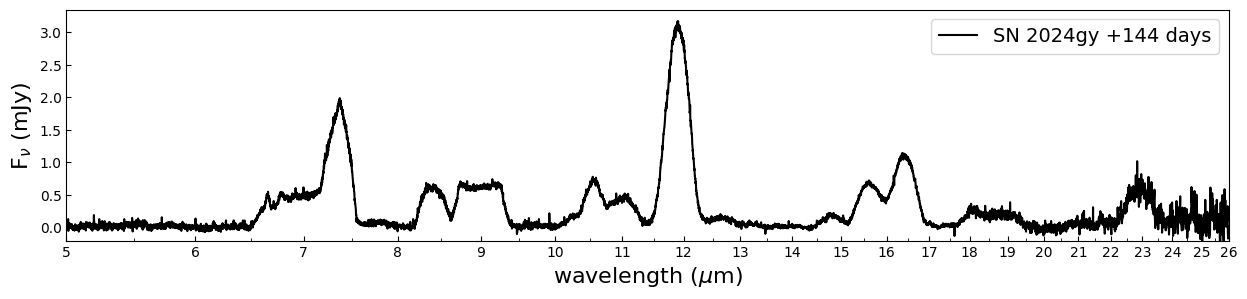

In [5]:
fig, ax = plt.subplots(figsize=(15, 3))

ax.plot(spec[0], spec[1], 'k', label='SN 2024gy +144 days')


ax.set_xlabel(r'wavelength ($\mu$m)', fontsize=16)
ax.set_ylabel(r'F$_\nu$ (mJy)', fontsize=16)

ax.set_xscale('log')
ax.xaxis.set_major_locator(MultipleLocator(1)) # adjust this if you change x-range
ax.xaxis.set_minor_locator(MultipleLocator(0.5)) # adjust this if you change x-range
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())  # ← hide minor labels
ax.ticklabel_format(style='plain', axis='x')
ax.tick_params(which='both', direction='in')

ax.legend(fontsize=14)

ax.set_xlim(5, 26)
ax.set_ylim(-0.2, )

# Part 1: Identify major lines in the SN 2024gy MIR spectrum
Use the <a href="https://linelist.pa.uky.edu/newpage/" target="_blank" rel="noopener noreferrer">
  AtomicLineList </a> to identify and mark the main lines. 

*Hint:* look for transitions to the ground state (or part of a cascade to the ground state).

### Plausible elements for SN Ia: 
Unburned material: **C, O** \
Low-mass elements (C burning): **Ne, Mg** \
Intermediate-mass elements: **Si, S, Ar, Ca** \
Transitional: **Ti, V, Cr, Mn** \
Iron-group elements: **Fe, Co, Ni, Cu, Zn**

### Plausible ionization states for SN Ia: 
**I**, **II**, **III**, **IV**, maybe **V**

In [6]:
# Fill out this dictionary with potential lines. [Ni II] 6.636 microns has been given as a starting example

lines_mir = {
    # "ion": wavelength (in microns)
    "[Ni II]": 6.636,
    
    # add yours!
}

(-0.2, 3.3791555042422132)

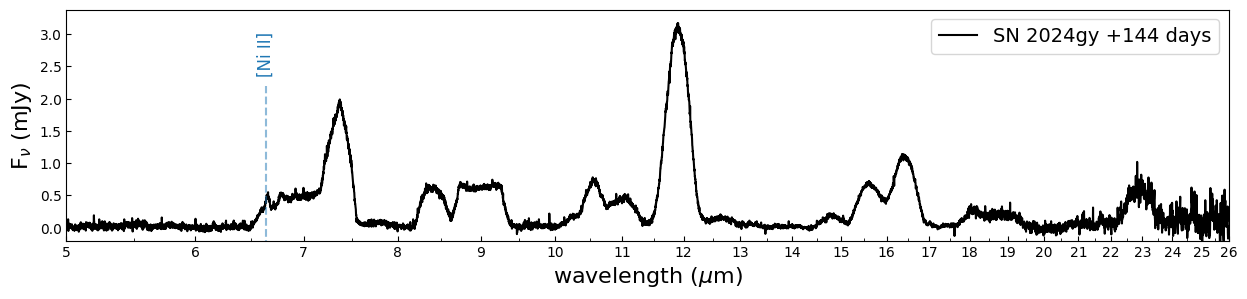

In [7]:
fig, ax = plt.subplots(figsize=(15, 3))

ax.plot(spec[0], spec[1], 'k', label='SN 2024gy +144 days')


ax.set_xlabel(r'wavelength ($\mu$m)', fontsize=16)
ax.set_ylabel(r'F$_\nu$ (mJy)', fontsize=16)

h = 2.2

for l in lines_mir.keys():
    ax.vlines(lines_mir[l], -1, h, color='tab:blue', ls='--', alpha=0.5)
    ax.text(lines_mir[l], h + 0.2, l, color='tab:blue', rotation=90, fontsize=12, ha='center')

ax.set_xscale('log')
ax.xaxis.set_major_locator(MultipleLocator(1)) # adjust this if you change x-range
ax.xaxis.set_minor_locator(MultipleLocator(0.5)) # adjust this if you change x-range
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())  # ← hide minor labels
ax.ticklabel_format(style='plain', axis='x')

ax.tick_params(which='both', direction='in')
ax.legend(fontsize=14)


ax.set_xlim(5, 26)
ax.set_ylim(-0.2, )

# Part 1b: (optional) now try the NIR
Yes, the wiggles from 3.6 - 5 microns are real - can you figure out what they are?

In [8]:
lines_nir = {
    # "ion":(wavelength, rotation=90, ha='center')
    "[Xx ?]": 2.2,  # random --> replace this
    
    # add yours!
}

(-0.05, 0.7)

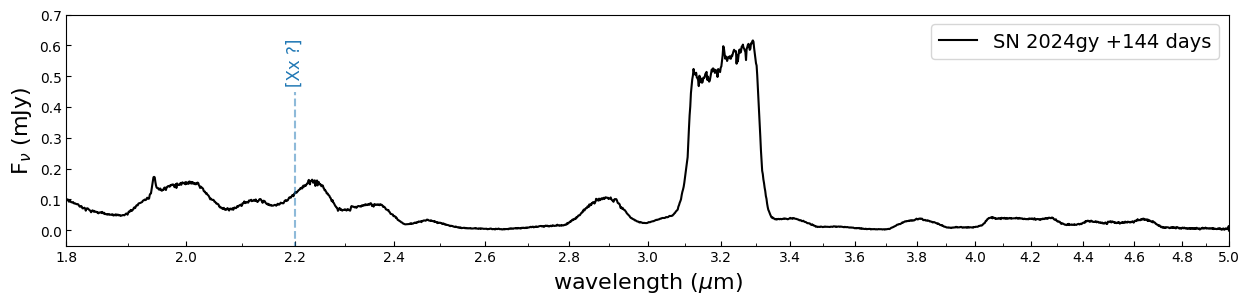

In [9]:
fig, ax = plt.subplots(figsize=(15, 3))

ax.plot(spec[0], spec[1], 'k', label='SN 2024gy +144 days')


ax.set_xlabel(r'wavelength ($\mu$m)', fontsize=16)
ax.set_ylabel(r'F$_\nu$ (mJy)', fontsize=16)

h = 0.45

for l in lines_nir.keys():
    ax.vlines(lines_nir[l], -1, h, color='tab:blue', ls='--', alpha=0.5)
    ax.text(lines_nir[l], h + 0.03, l, color='tab:blue', rotation=90, fontsize=12, ha='center')

ax.set_xscale('log')
ax.xaxis.set_major_locator(MultipleLocator(0.2)) # adjust this if you change x-range
ax.xaxis.set_minor_locator(MultipleLocator(0.1)) # adjust this if you change x-range
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())  # ← hide minor labels
ax.ticklabel_format(style='plain', axis='x')

ax.tick_params(which='both', direction='in')
ax.legend(fontsize=14)

ax.set_xlim(1.8, 5)
ax.set_ylim(-0.05, 0.7)

# Part 2: Compare profiles in velocity space
To help confirm a line ID, check transitions from the same ion in velocity space.\
They should line up similarly because they should be coming from (approximately) the same emitting material.\
Line profiles can differ between ionization states of the same element, but if they are wildly different, it could be a red flag.

In [10]:
def lam_to_vel(lam, lam_0):
    """
    Convert wavelength to LOS velocity using the relativistic Doppler formula.

    Parameters
    ----------
    lam : Quantity
        Observed wavelength(s), with units.
    lam_0 : Quantity
        Rest wavelength, with units.

    Returns
    -------
    v_los : Quantity
        Line-of-sight velocity with units of km/s.
    """
    R = (lam / lam_0).decompose()     # dimensionless
    beta = (R**2 - 1) / (R**2 + 1)
    return (beta * const.c).to(u.km / u.s)


def vel_to_lam(v_los, lam_0):
    """
    Convert LOS velocity to observed wavelength using the relativistic Doppler formula.

    Parameters
    ----------
    v_los : Quantity
        Line-of-sight velocity.
    lam_0 : Quantity
        Rest wavelength, with units.

    Returns
    -------
    lam : Quantity
        Observed wavelength(s), with units.
    """
    beta = (v_los / c).decompose()
    doppler = np.sqrt((1 + beta) / (1 - beta))
    return lam_0 * doppler


### Choose lines to compare
Check several pairs of lines to compare that span different wavelengths, different ionization states, different elements, and different element groups.\
What do you notice? What does it tell you?

In [11]:
# Rest wavelengths of lines to compare
# Example:
lam0_1 = 6.636 * u.um  # [Ni II] in MIR   <-- make these your own
lam0_2 = 1.939 * u.um  # [Ni II] in NIR

### Convert to velocity space (Doppler shift)

In [12]:
vels_1 = lam_to_vel(spec[0], lam0_1)
vels_2 = lam_to_vel(spec[0], lam0_2)

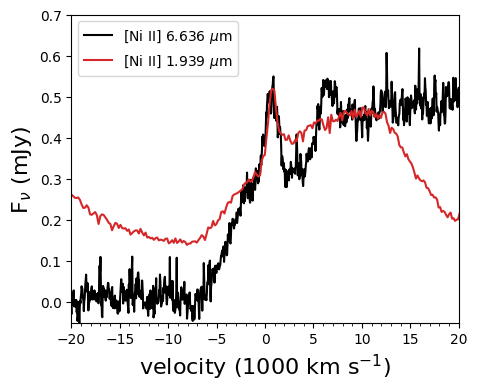

In [13]:
fig, ax = plt.subplots(figsize=(5, 4))

ion = '[Ni II]'  # <-- change this
xlims = (-20, 20)
ylims = (-0.05, 0.7)  # <-- and this

scale = 3  # might need to scale one of the lines for better comparison

ax.plot(vels_1/1000, spec[1], 'k', label=r'{} {} $\mu$m'.format(ion, (lam0_1.to(u.um)).value))
ax.plot(vels_2/1000, spec[1] * scale, 'tab:red', label=r'{} {} $\mu$m'.format(ion, (lam0_2.to(u.um)).value))


ax.set_xlabel(r'velocity (1000 km s$^{-1}$)', fontsize=16)
ax.set_ylabel(r'F$_\nu$ (mJy)', fontsize=16)

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_minor_formatter(NullFormatter())  # <-- hide minor labels

ax.set_xlim(*xlims)
ax.set_ylim(*ylims)
ax.legend()

# Part 3: Using a model line list (optional) 
If models are available for the type of object you are studying, atomic data / line lists from those can be extremely helpful. \
Be aware that models may not match the observations and may over- or underestimate the strength of particular ions. \
Some models do not have atomic data for certain ions, but that doesn't necessarily mean they can't be present in your data.

Below is an example of a CMFGEN output of predicted lines and strengths for a SN Ia delayed detonation model at 150 days post explosion.

In [14]:
# Example line list from a CMFGEN model of a delayed detonation at 150 days post explosion

fname = 'ddt_2013_N100_neb_ddt_150d_lineid_ewfrac_0p001_dlam_3500_10000.dat'

In [15]:
# Read in and parse the line list into a dataframe
with open(fname) as f:
    comments = [line for line in f if line.startswith('#')]
header_line = comments[-1].lstrip('#').strip()
colnames = header_line.split()

# Now read the data with those column names
model_df = pd.read_csv(fname, comment='#', delim_whitespace=True, names=colnames)
model_df['lam'] *= 1e-4  # convert to microns (from Angstroms)
model_df

# The most important columns here are:
# "lam" (the wavelength)
# "ew" (EW or expected strength)
# "ion" (the ion; note that CoI = Co I, Co2 = Co II, CoIII = Co III, and "Nk, Tk, Sk" = "Ni, Ti, Si")
# "type" (PERM = permitted transition, SEMI = semi-forbidden transition, FORB = forbidden transition)
# "nl" and "nu" (lower and upper levels of the transition)

/var/folders/20/lgg891h106qgf648l2wp1kgw0000gn/T/ipykernel_87296/4133023327.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  model_df = pd.read_csv(fname, comment='#', delim_whitespace=True, names=colnames)


,lam,ew,|ew/max|,cflux,lflux,lflux/max,nl,nu,ion,trans,type,lam_max,ewmax,lfluxmax,trans_max
0,0.350171,31040.0,0.015926,520.1,3.944000e-05,0.253800,16,52,Co2,3d7(4P)4s_5Pe[3]-3d7(4F)4p_5Do[4],PERM,9530.62,1949000.0,0.000155,SIII(3s2_3p2_1De[2]-3s2_3p2_3Pe[2])
1,0.350228,2878.0,0.001477,520.1,3.656000e-06,0.023526,5,64,CoI,3d8(3F)4s_b4Fe[9/2]-3d8(3F)4p_y4Do[7/2],PERM,9530.62,1949000.0,0.000155,SIII(3s2_3p2_1De[2]-3s2_3p2_3Pe[2])
2,0.350590,2553.0,0.001310,516.6,3.215000e-06,0.020689,28,72,Tk2,3d2(1G)4s_b2Ge[7/2]-3d2(1G)4p_y2Go[9/2],PERM,9530.62,1949000.0,0.000155,SIII(3s2_3p2_1De[2]-3s2_3p2_3Pe[2])
3,0.350631,2961.0,0.001519,516.6,3.727000e-06,0.023983,6,67,CoI,3d8(3F)4s_b4Fe[7/2]-3d8(3F)4p_y4Do[5/2],PERM,9530.62,1949000.0,0.000155,SIII(3s2_3p2_1De[2]-3s2_3p2_3Pe[2])
4,0.350778,10900.0,0.005593,516.2,1.370000e-05,0.088160,22,69,Co2,3d7(2G)4s_3Ge[3]-3d7(4F)4p_3Fo[2],PERM,9530.62,1949000.0,0.000155,SIII(3s2_3p2_1De[2]-3s2_3p2_3Pe[2])
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,25.927000,139400.0,0.071524,507.6,3.155000e-08,0.000203,3,4,FeV,3d4_5De[2]-3d4_5De[3],FORB,9530.62,1949000.0,0.000155,SIII(3s2_3p2_1De[2]-3s2_3p2_3Pe[2])
639,25.981000,659100.0,0.338170,507.8,1.486000e-07,0.000956,1,2,Fe2,3d6(5D)4s_a6De[9/2]-3d6(5D)4s_a6De[7/2],FORB,9530.62,1949000.0,0.000155,SIII(3s2_3p2_1De[2]-3s2_3p2_3Pe[2])
640,26.089000,28010.0,0.014371,508.3,6.268000e-09,0.000040,6,7,CoIII,3d7_a4Pe[3/2]-3d7_a4Pe[1/2],FORB,9530.62,1949000.0,0.000155,SIII(3s2_3p2_1De[2]-3s2_3p2_3Pe[2])
641,26.124000,27720.0,0.014223,508.4,6.189000e-09,0.000040,15,16,FeIII,3d6_3Ge[5]-3d6_3Ge[4],FORB,9530.62,1949000.0,0.000155,SIII(3s2_3p2_1De[2]-3s2_3p2_3Pe[2])


In [16]:
# Dropping columns we don't need
model_df = model_df[['lam', 'ew', 'ion', 'type', 'nl', 'nu']]


### Nearby lines

In [17]:
def find_n_closest_values(df, column_name, target_value, n):
    # Calculate the absolute difference between the target value and each value in the column
    df['difference'] = np.abs(df[column_name] - target_value)
    
    # Sort the DataFrame by the difference
    sorted_df = df.sort_values(by='difference')
    
    # Return the top n rows with the smallest differences
    closest_values = sorted_df.head(n)
    
    # Drop the difference column if you don't want to keep it in the final output
    closest_values = closest_values.drop(columns=['difference'])
    
    return closest_values


In [18]:
# Find lines near a particular wavelength

approx_lam = 6.64  # microns   <-- play around with this, and go check your above line IDs

result = find_n_closest_values(model_df, 'lam', approx_lam, 10)  # 10 nearest lines
result

/var/folders/20/lgg891h106qgf648l2wp1kgw0000gn/T/ipykernel_87296/2298871243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difference'] = np.abs(df[column_name] - target_value)


,lam,ew,ion,type,nl,nu
589,6.63416,22300.0,Nk2,FORB,1,2
590,6.98339,1506000.0,Ar2,FORB,1,2
588,6.21176,16520.0,Co2,FORB,12,13
591,7.34716,21690000.0,NkIII,FORB,1,2
587,5.70281,7631.0,Co2,FORB,12,14
592,7.78847,292000.0,FeIII,FORB,6,10
586,5.41593,19220.0,CoIV,FORB,6,10
585,5.33871,11890.0,Fe2,FORB,1,6
593,8.20673,7631.0,FeIII,FORB,9,13
584,4.88781,5652.0,Fe2,FORB,2,7


### Make your own function(s) to sort by line strength or ion:

In [19]:
# choose your own adventure



# Part 4: More challenging extensions (optional)

### Type Iax SN 2024pxl: mixing permitted and forbidden lines
Lots of narrow lines, and a mix of permitted and forbidden lines in the NIR at early times ~50 days post-explosion. \
Recommended to use the "def_2014_N1def_50d_lineid_ewfrac_0p0001_dlam_3500_10000.dat" model line list file.

(Kwok et al. 2025a)

In [20]:
z_24pxl = 0.006

wave, F_nu = np.genfromtxt('SN2024pxl_opt+NIR+MIR_spectrum.dat', unpack=True)
wave = wave/(1+z_24pxl) * u.um  # correct to SN rest wavelength
F_nu *= u.mJy

spec_24pxl = wave, F_nu

In [21]:
# Fill out this dictionary with potential lines. [Ni II] 6.636 microns has been given as a starting example

lines_24pxl = {
    # "ion": wavelength (in microns)
    "[Ni II]": 6.636,
    
    # add yours!
}

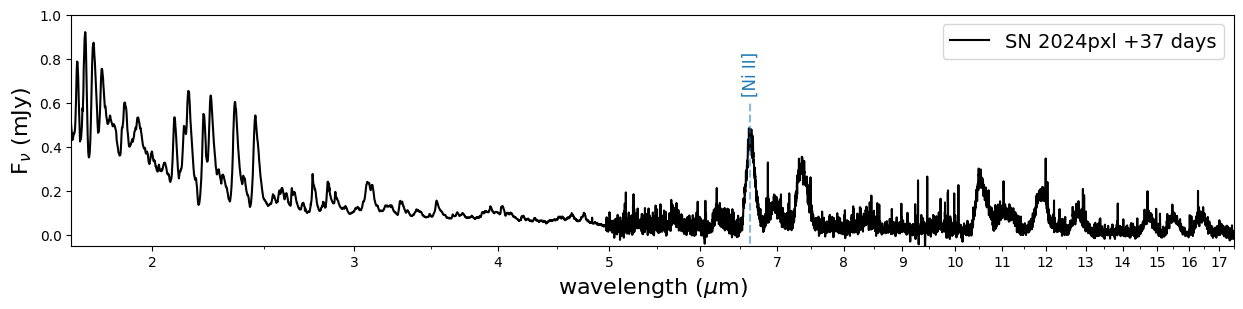

In [22]:
fig, ax = plt.subplots(figsize=(15, 3))

ax.plot(spec_24pxl[0], spec_24pxl[1], 'k', label='SN 2024pxl +37 days')

h = 0.6

for l in lines_24pxl.keys():
    ax.vlines(lines_24pxl[l], -1, h, color='tab:blue', ls='--', alpha=0.5)
    ax.text(lines_24pxl[l], h + 0.05, l, color='tab:blue', rotation=90, fontsize=12, ha='center')

ax.set_xlabel(r'wavelength ($\mu$m)', fontsize=16)
ax.set_ylabel(r'F$_\nu$ (mJy)', fontsize=16)

ax.set_xscale('log')
ax.xaxis.set_major_locator(MultipleLocator(1)) # adjust this if you change x-range
ax.xaxis.set_minor_locator(MultipleLocator(0.5)) # adjust this if you change x-range
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())  # ← hide minor labels
ax.ticklabel_format(style='plain', axis='x')

ax.set_xlim(1.7, 17.5)
ax.set_ylim(-0.05, 1.0)
ax.legend(fontsize=14)

### Type II SN 2023ixf: molecules, dust, hydrogen, and emission lines
Can you find the hydrogen line series, emission lines from nucleosynthesized products, and contributions from dust and molecules?

(Medler et al. 2025)

In [23]:
z_23ixf = 0.0008

wave, F_nu = np.genfromtxt('SN2023ixf_NIR+MIR_+253d_spectrum.dat', unpack=True)
wave = wave/(1+z_23ixf) * u.um  # correct to SN rest wavelength
F_nu *= u.mJy

spec_23ixf = wave, F_nu

In [24]:
# Fill out this dictionary with potential lines. [Ni II] 6.636 microns has been given as a starting example

lines_23ixf = {
    # "ion": wavelength (in microns)
    "[Ni II]": 6.636,
    
    # add yours!
}

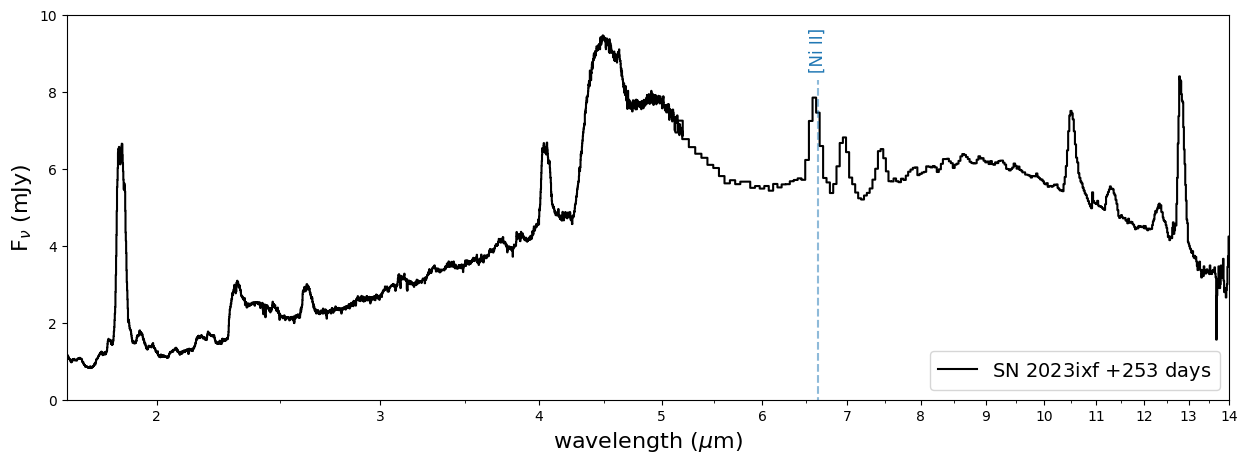

In [38]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.step(spec_23ixf[0], spec_23ixf[1], 'k', label=r'SN 2023ixf $+$253 days')

h = 8.3

for l in lines_23ixf.keys():
    ax.vlines(lines_23ixf[l], -1, h, color='tab:blue', ls='--', alpha=0.5)
    ax.text(lines_23ixf[l], h + 0.3, l, color='tab:blue', rotation=90, fontsize=12, ha='center')

ax.set_xlabel(r'wavelength ($\mu$m)', fontsize=16)
ax.set_ylabel(r'F$_\nu$ (mJy)', fontsize=16)

ax.set_xscale('log')
ax.xaxis.set_major_locator(MultipleLocator(1)) # adjust this if you change x-range
ax.xaxis.set_minor_locator(MultipleLocator(0.5)) # adjust this if you change x-range
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())  # ← hide minor labels
ax.ticklabel_format(style='plain', axis='x')

ax.set_xlim(1.7, 14)
ax.set_ylim(0, 10)
ax.legend(fontsize=14, loc='lower right')